##Import Data and Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/fhc-smt/Applied-Ecology/6252407752cea1aa71e90e9cd5a0887a6ee4f929/Datasheet%20for%20fieldwork_Combined_Group%201.xlsx"

# Read with second row as header
df_eco = pd.read_excel(url, header=1)

# Rename columns (simplier)
df_eco = df_eco.rename(columns={
    "Tree #": "tree_id",
    "Species (latin name)": "species",
    "Plot (mixed vs. mono)": "plot_type",
    "DBH (in cm)": "dbh",
    "Height (in m)": "height",
    "Aboveground biomass (in kg)": "agb",
    "LAI (m²/m²)": "lai",
    "Shannon index": "shannon",
    "Soil pH": "soil_pH",
    "IBP": "ibp",
    "Group": "group"
})

# Quick check
print(df_eco.head())
print(df_eco.columns)

   tree_id          species plot_type        dbh  height         agb   lai  \
0        1      Picea Abies     Mixed   3.501409     3.5    1.580764  6.41   
1        2      Picea Abies     Mixed  12.095776    10.3   34.912901  6.41   
2        3  Fagus Sylvatica     Mixed   1.591549     3.9    0.329498  6.41   
3        4  Fagus Sylvatica     Mixed   7.002817     9.9   13.961873  6.41   
4        5       Abies Alba     Mixed  21.008452    14.2  121.931366  6.41   

   shannon  soil_pH   ibp  group  
0  1.17106     4.89  25.0      1  
1  1.17106     4.89  25.0      1  
2  1.17106     4.89  25.0      1  
3  1.17106     4.89  25.0      1  
4  1.17106     4.89  25.0      1  
Index(['tree_id', 'species', 'plot_type', 'dbh', 'height', 'agb', 'lai',
       'shannon', 'soil_pH', 'ibp', 'group'],
      dtype='object')


In [ ]:
numeric_cols = ["dbh", "height", "agb", "lai", "shannon", "soil_pH", "ibp"]
tree_cols = ["tree_id", "species", "plot_type", "dbh", "height", "agb"]
tree_num_cols = ["dbh", "height", "agb"]
plot_cols = ["lai", "shannon", "soil_pH", "ibp"]

In [ ]:
# Drop missing value rows and mort trees:
df_eco = (
    df_eco
    # drop rows with missing numeric values
    .dropna(subset=numeric_cols)
    # drop rows where species contains "(mort)"
    .loc[~df_eco["species"].str.contains(r"\(mort\)", case=False, na=False)]
    # reset index
    .reset_index(drop=True)
)

print(df_eco.info())
print(df_eco.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tree_id    191 non-null    int64  
 1   species    191 non-null    object 
 2   plot_type  191 non-null    object 
 3   dbh        191 non-null    float64
 4   height     191 non-null    float64
 5   agb        191 non-null    float64
 6   lai        191 non-null    float64
 7   shannon    191 non-null    float64
 8   soil_pH    191 non-null    float64
 9   ibp        191 non-null    float64
 10  group      191 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 16.5+ KB
None
   tree_id          species plot_type        dbh  height         agb   lai  \
0        1      Picea Abies     Mixed   3.501409     3.5    1.580764  6.41   
1        2      Picea Abies     Mixed  12.095776    10.3   34.912901  6.41   
2        3  Fagus Sylvatica     Mixed   1.591549     3.9    0.329498  6.4

## Tree-level metrics

In [ ]:
# Count species occurrences by plot_type
species_counts = (
    df_eco.groupby(["plot_type", "species"])
    .size()
    .reset_index(name="count")
    .sort_values(by=["plot_type", "count"], ascending=[True, False])
)

print(species_counts)

   plot_type            species  count
2      Mixed    Fagus Sylvatica     43
4      Mixed        Picea Abies     35
0      Mixed         Abies Alba     19
6      Mixed      Quercus Robur      3
1      Mixed    Castanea Sativa      2
3      Mixed              Picea      2
5      Mixed    Quercus Petraea      1
7       Mono         Abies Alba     28
14      Mono        Picea Abies     22
12      Mono    Fagus Sylvatica      9
13      Mono              Picea      9
15      Mono   Pinus Sylvestris      8
11      Mono   Corylus Avellana      4
8       Mono   Castanea Dentata      2
9       Mono    Castanea Sativa      2
10      Mono    Castanea sativa      1
16      Mono  Sambucus Racemosa      1


In [ ]:
summary_by_species = df_eco.groupby(["plot_type", "species"])[tree_num_cols].mean().reset_index()

print(summary_by_species)

   plot_type            species        dbh     height          agb
0      Mixed         Abies Alba   9.416635   5.804211    42.504665
1      Mixed    Castanea Sativa  27.215495  14.500000   453.996800
2      Mixed    Fagus Sylvatica  19.269017  13.546512  1481.787316
3      Mixed              Picea  33.581693  21.700000   551.073373
4      Mixed        Picea Abies  10.341660   6.871143   121.350493
5      Mixed    Quercus Petraea  66.800000  29.000000  3604.420000
6      Mixed      Quercus Robur  53.900474  30.600000  2151.213277
7       Mono         Abies Alba  28.755206  20.968571   534.110451
8       Mono   Castanea Dentata   2.900000   2.750000     0.820000
9       Mono    Castanea Sativa   2.705634   2.350000     1.530341
10      Mono    Castanea sativa   1.051059   1.700000     2.154766
11      Mono   Corylus Avellana   2.148974   2.897500     3.392948
12      Mono    Fagus Sylvatica   2.149002   2.478889     1.149768
13      Mono              Picea  27.692960  16.866667   276.11

Mean DBH, Height, AGB by Plot Type:
  plot_type        dbh     height         agb
0     Mixed  16.376549  10.728286  769.903911
1      Mono  24.597675  19.010698  469.580719


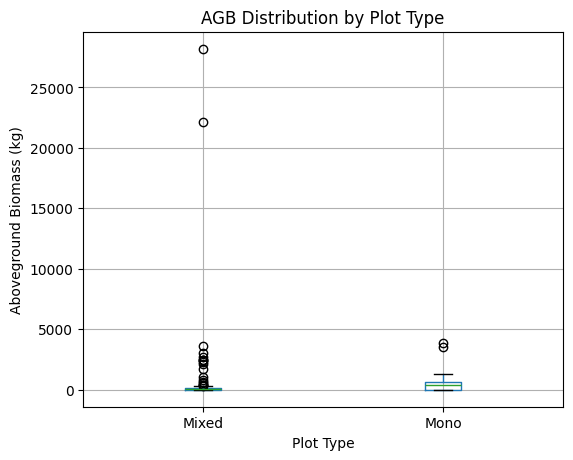

In [ ]:
#Compare Mixed and Mono

# Calculate means
means = df_eco.groupby("plot_type")[["dbh", "height", "agb"]].mean().reset_index()
print("Mean DBH, Height, AGB by Plot Type:")
print(means)

# Distribution plot for AGB (boxplot)
df_eco.boxplot(column="agb", by="plot_type", figsize=(6,5))
plt.title("AGB Distribution by Plot Type")
plt.suptitle("")
plt.xlabel("Plot Type")
plt.ylabel("Aboveground Biomass (kg)")
plt.show()
